### Basic Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd

dist =torch.distributions

sns.reset_defaults()
sns.set_context(context="talk", font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
from astra.torch.data import load_cifar_10
from astra.torch.utils import train_fn

/home/nipun.batra/miniforge3/lib/python3.9/site-packages/astra/torch/data.py:12: UserWarning: TORCH_HOME not set, setting it to /home/nipun.batra/.cache/torch
  warnings.warn(f"TORCH_HOME not set, setting it to {os.environ['TORCH_HOME']}")


In [7]:
### Vanilla Autoencoder 

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(32 * 32 * 3, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 32 * 32 * 3),
            nn.Sigmoid()  # Sigmoid activation for pixel values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
dataset = load_cifar_10()
dataset

Files already downloaded and verified
Files already downloaded and verified



CIFAR-10 Dataset
length of dataset: 60000
shape of images: torch.Size([3, 32, 32])
len of classes: 10
classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
dtype of images: torch.float32
dtype of labels: torch.int64
            

In [12]:
# Train over 1000 images
train_idx = torch.arange(1000)

X = dataset.data[train_idx].to(device)


model = Autoencoder().to(device)

In [13]:
# Get reconstruction
def get_reconstruction(model, X):
    with torch.no_grad():
        model.eval()
        X = X.view(-1, 32 * 32 * 3)
        X_hat = model(X)
        X_hat = X_hat.view(-1, 3, 32, 32)
        return X_hat

In [14]:
get_reconstruction(model, X).shape

torch.Size([1000, 3, 32, 32])

In [19]:
# Plot original and reconstructed images
def plot_reconstructions(model, X, n=5):
    X = X[:n]
    X_hat = get_reconstruction(model, X)
    X = X.cpu().numpy().transpose(0, 2, 3, 1)
    X_hat = X_hat.cpu().numpy().transpose(0, 2, 3, 1)
    fig, axes = plt.subplots(n, 2, figsize=(10, 10))
    for i in range(n):
        axes[i, 0].imshow(X[i])
        axes[i, 1].imshow(X_hat[i])
    # Remove xticks and yticks
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()

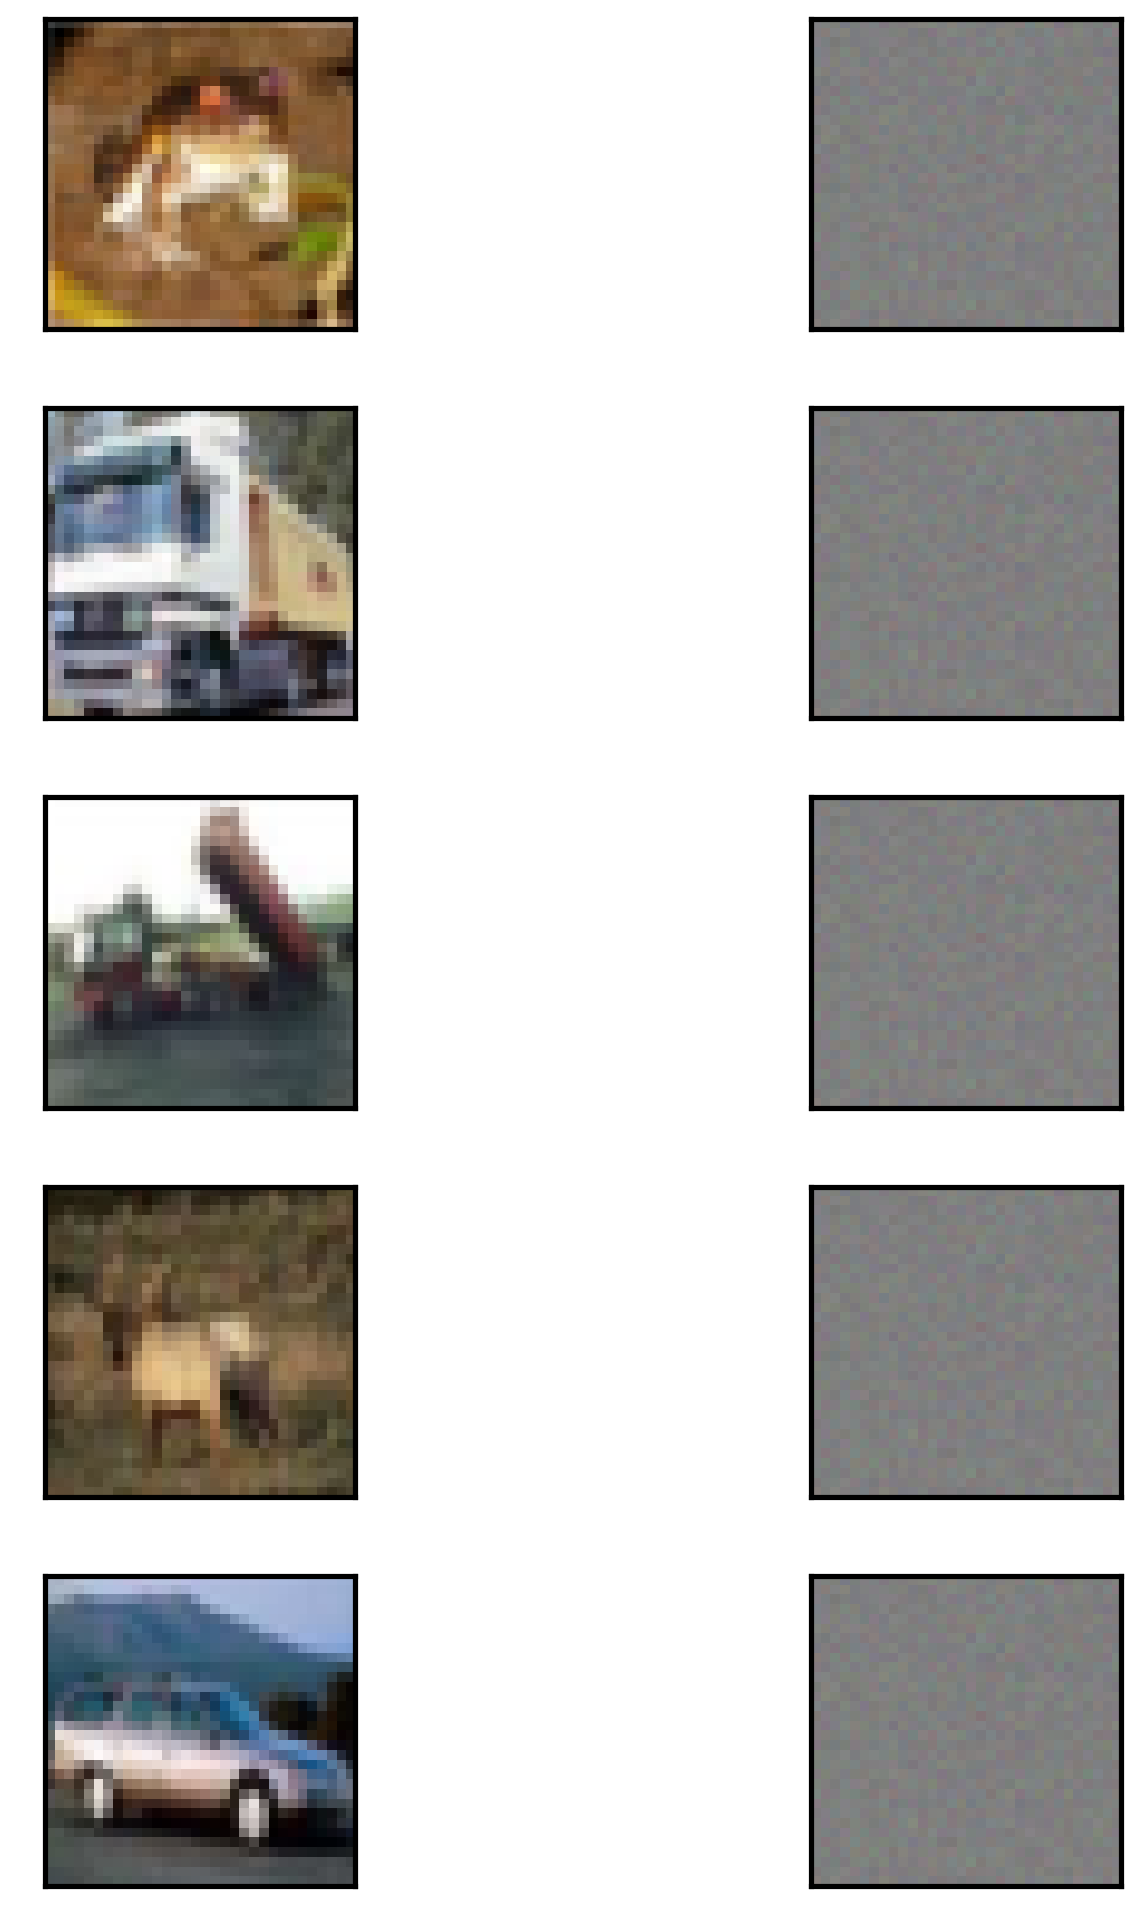

In [20]:
plot_reconstructions(model, X)

In [23]:
criterion = nn.MSELoss()
iter_losses, epoch_losses = train_fn(model, X, X, criterion, lr=3e-4, 
                                     batch_size=128, epochs=30, verbose=False)

AttributeError: 'Autoencoder' object has no attribute 'device'

In [24]:
X.shape

torch.Size([1000, 3, 32, 32])

In [ ]:
X = torch.randn(1000, 3, 32, 32).to(device)